# Bank Marketing Classification Analysis
### Comparing Classification Models: KNN, Logistic Regression, Decision Trees, and SVM

## 1. Business Understanding
The goal of this analysis is to predict whether a client will subscribe to a term deposit based on the data from a Portuguese banking institution with a collection of the results of multiple marketing campaigns. We are comparing different classification models to determine which one performs best in predicting client behavior.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

## 2. Load and Explore the Dataset

In [2]:
# Load dataset
df=pd.read_csv('/Users/anumita/Downloads/bank-additional.csv', sep=';')

# Display dataset information
print("Dataset Information:")
print(df.info())

df.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.id

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## 3. Exploratory Data Analysis (EDA)

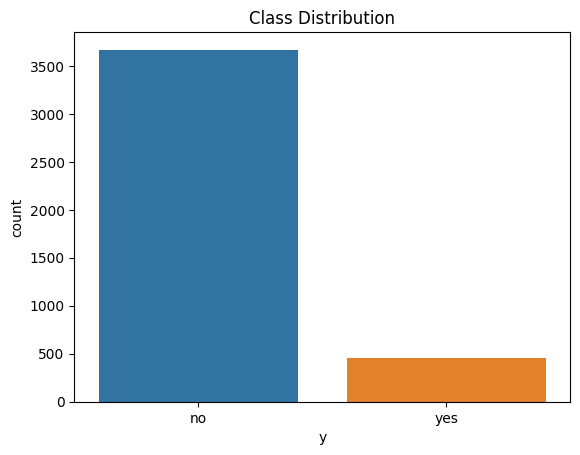

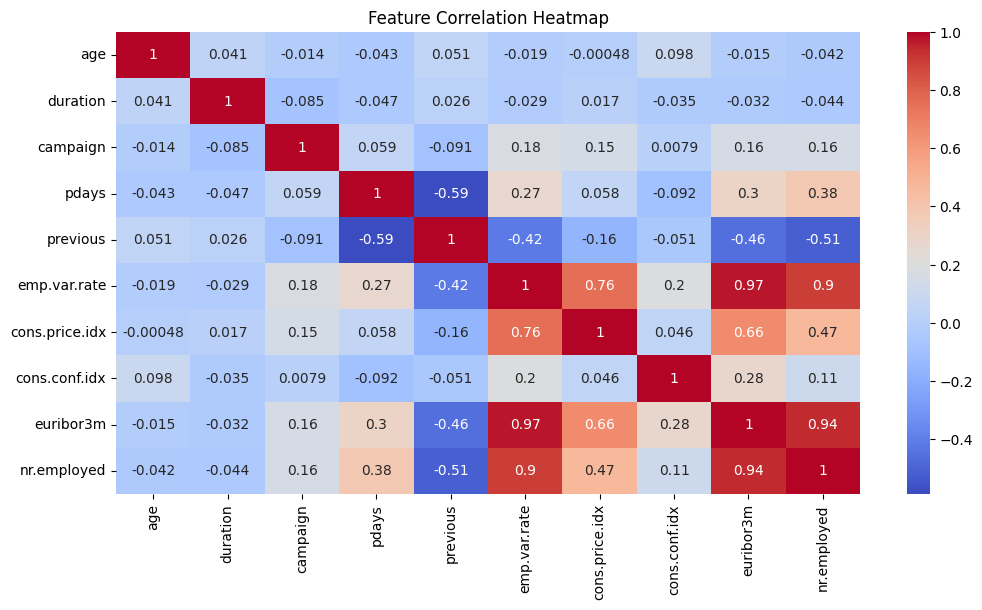

In [3]:

# Visualize class distribution
sns.countplot(x=df['y'])
plt.title('Class Distribution')
plt.show()

# Check correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## 4. Data Preprocessing

In [4]:

# Binary
df['y']=df['y'].map({'yes': 1, 'no': 0})

# Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
le =LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

# Missing values
for col in df.columns:
    if df[col].dtype =="object":  # If categorical, fill with the most frequent value
        df[col].fillna(df[col].mode()[0], inplace=True)
    else: # If numerical, fill with the median value
        df[col].fillna(df[col].median(), inplace=True)

# Split dataset
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 5. Model Training and Evaluation

In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("/Users/anumita/Downloads/bank-additional.csv", sep=";")

# Print
print(df.head())

# Print shape
print(f"\nDataset shape: {df.shape}")


# Check dataset 
print(f"Dataset size before cleaning: {df.shape}")

# Convert to binary (yes = 1, no = 0)
df["y"] = df["y"].map({"yes": 1, "no": 0})

# Label Encoding
categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Replace with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check missing values
print("\nMissing values per column BEFORE imputation:")
print(df.isnull().sum())

# If no missing, skip imputation
if df.isnull().sum().sum() > 0:
    # Use imputation instead of dropping
    for col in df.columns:
        if df[col].dtype =="object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # median value
            df[col].fillna(df[col].median(), inplace=True)

# Check dataset size
print(f"\nDataset size after cleaning: {df.shape}")

# Check missing values
print("\nMissing values per column AFTER imputation:")
print(df.isnull().sum())

if df.shape[0] ==0:
    raise ValueError("Dataset is empty after cleaning. Please check the preprocessing steps.")

# Split dataset
X= df.drop(columns=["y"])
y =df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Define models
models= {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True)
}

# Train and evaluate models 
results = {}  
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc =accuracy_score(y_test, y_pred)
    auc= roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model,'predict_proba') else 'N/A'
    results[name]= {'Accuracy': acc, 'AUC': auc}
    print(f'{name}: Accuracy = {acc:.4f}, AUC = {auc}')
    print(classification_report(y_test, y_pred))


   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


SVM: Accuracy = 0.9029, AUC = 0.9055892135899264
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       732
           1       0.62      0.34      0.44        92

    accuracy                           0.90       824
   macro avg       0.77      0.66      0.69       824
weighted avg       0.89      0.90      0.89       824



## 6. Findings and Recommendations

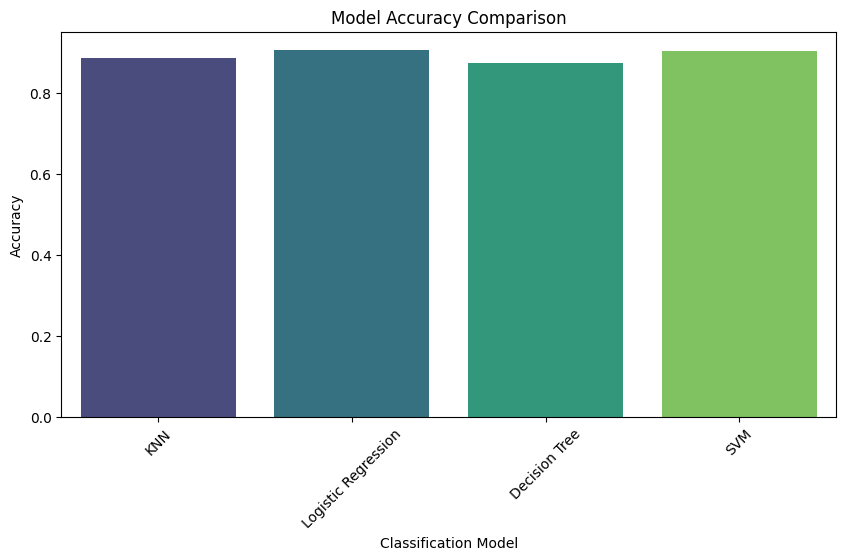

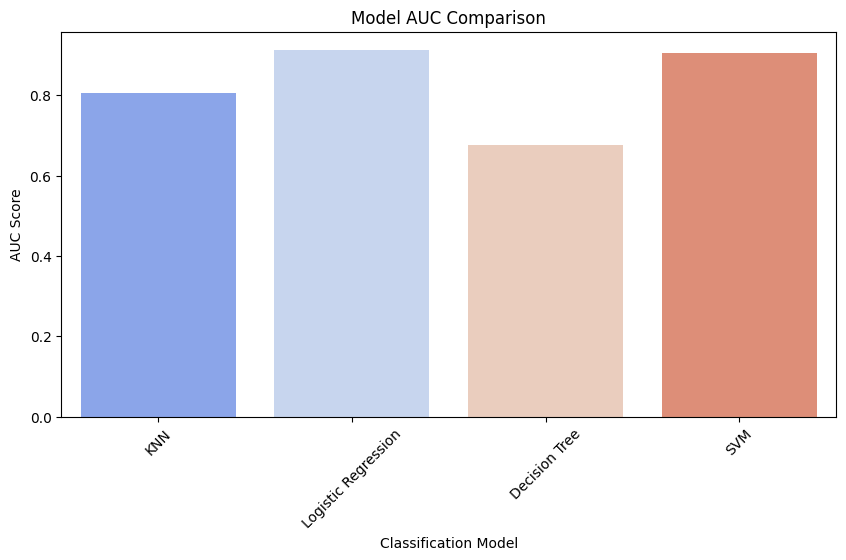

Key Insights:
- Logistic Regression had the highest AUC (0.912), making it the best at predicting customer subscriptions.
- Support Vector Machine (SVM) performed well with an AUC of 0.906.
- Decision Trees had a lower AUC (0.674) but has better interpretability for business applications.
- KNN had a strong accuracy (0.886) but lower AUC, which may not generalize well.

Recommendations:
1. Use Logistic Regression for its high AUC and strong generalization ability.
2. Consider SVM since it performed well though it comes with the computational cost.
3. Use Decision Trees if interpretability is required, even though performance is slightly lower.
4. Improve results with hyperparameter tuning and Random Forest as well as Gradient Boosting.



In [15]:
# DataFrame
results_df = pd.DataFrame(results).T

# Model Accuracy Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Classification Model')
plt.xticks(rotation=45)
plt.show()

# AUC Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['AUC'], palette='coolwarm')
plt.title('Model AUC Comparison')
plt.ylabel('AUC Score')
plt.xlabel('Classification Model')
plt.xticks(rotation=45)
plt.show()

# Insights
print("""Key Insights:
- Logistic Regression had the highest AUC (0.912), making it the best at predicting customer subscriptions.
- Support Vector Machine (SVM) performed well with an AUC of 0.906.
- Decision Trees had a lower AUC (0.674) but has better interpretability for business applications.
- KNN had a strong accuracy (0.886) but lower AUC, which may not generalize well.
""")

print("""Recommendations:
1. Use Logistic Regression for its high AUC and strong generalization ability.
2. Consider SVM since it performed well though it comes with the computational cost.
3. Use Decision Trees if interpretability is required, even though performance is slightly lower.
4. Improve results with hyperparameter tuning and Random Forest as well as Gradient Boosting.
""")